<a href="https://colab.research.google.com/github/shionguha/inf2178-expdesignfordatascience-w23/blob/main/Prediction_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{:.4f}".format(x)})
pd.options.display.float_format = "{:.4f}".format
from scipy.stats import t
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None #show all columns in data

# Load dataset

In [66]:
url = 'https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/Lab/student-por.csv'
df = pd.read_csv(url)

In [67]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


# Select features of interest

In [68]:
#I select some random numerical features. Note, you will want to one hot encode non-numerical features 
x = df[['age', 'traveltime', 'studytime', 'health', 'absences', 'G1', 'paid']].copy()
x['paid'] = pd.get_dummies(df.paid, drop_first=True)

# Select the response column 
y = df['G3']

In [69]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         649 non-null    int64
 1   traveltime  649 non-null    int64
 2   studytime   649 non-null    int64
 3   health      649 non-null    int64
 4   absences    649 non-null    int64
 5   G1          649 non-null    int64
 6   paid        649 non-null    uint8
dtypes: int64(6), uint8(1)
memory usage: 31.2 KB


# Train test split 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 

In [70]:
# Split these data into training and testing datasets
#set random seed for replicability 
#you may want to consider stratifying your train test split (creates splits by preserving the same percentage for each target class as in the complete set.)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)

In [71]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("\n========== Training data ==========")
display(y_train.describe().T)
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n========== Test data ==========")
display(y_test.describe().T)

X_train shape: (519, 7)
y_train shape: (519,)

========== Training data ==========


count   519.0000
mean     11.8285
std       3.2101
min       0.0000
25%      10.0000
50%      12.0000
75%      14.0000
max      19.0000
Name: G3, dtype: float64

X_test shape: (130, 7)
y_test shape: (130,)

========== Test data ==========


count   130.0000
mean     12.2154
std       3.3061
min       0.0000
25%      10.0000
50%      12.0000
75%      14.0000
max      18.0000
Name: G3, dtype: float64

# Running OLS

In [72]:
#model needs an intercept so we add a column of 1s
X = sm.add_constant(X_train)
X

,const,age,traveltime,studytime,health,absences,G1,paid
243,1.0000,17,2,3,3,0,15,0
234,1.0000,17,2,2,5,0,11,0
527,1.0000,16,4,3,3,0,10,0
177,1.0000,16,1,1,2,2,9,0
226,1.0000,16,1,2,4,0,13,0
...,...,...,...,...,...,...,...,...
98,1.0000,16,1,1,1,4,12,0
322,1.0000,19,1,2,3,0,9,0
382,1.0000,17,1,1,5,2,11,1
365,1.0000,17,1,2,5,14,15,0


In [73]:
#fit and see summary (we are used to this now)
OLS = sm.OLS(y_train, sm.add_constant(X_train)).fit() 
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     157.0
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          5.32e-123
Time:                        18:03:36   Log-Likelihood:                -1043.4
No. Observations:                 519   AIC:                             2103.
Df Residuals:                     511   BIC:                             2137.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3630      1.282     -0.283      0.7

# Get the prediction interval 

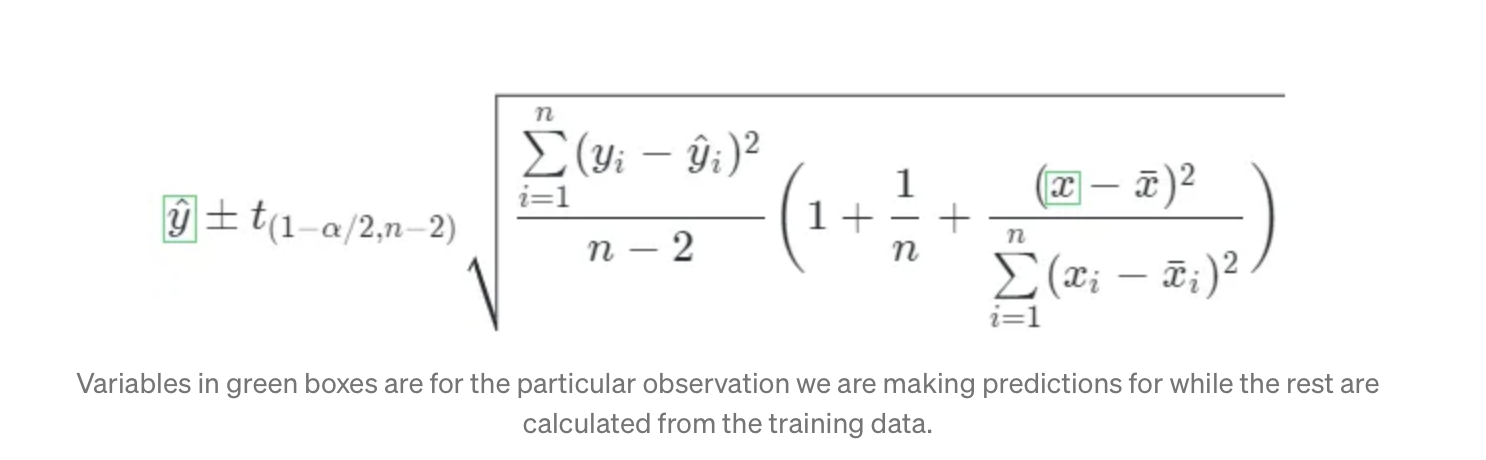

◼️ mean: Prediction, same as y_pred from earlier.  
◼️ mean_ci_lower & mean_ci_upper: Confidence interval boundaries.   
◼️ obs_ci_lower & obs_ci_upper: Prediction interval boundaries, same as lower and upper from earlier.  

Reference (https://towardsdatascience.com/prediction-intervals-in-python-64b992317b1a)

In [74]:
#Get the mean prediction, confidence interval boundaries, prediction interval boundaries
sm_pred = OLS.get_prediction(sm.add_constant(X_test)).summary_frame(alpha=0.05)
sm_pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
376,14.7480,0.2020,14.3512,15.1448,11.1492,18.3468
142,11.4397,0.1644,11.1168,11.7626,7.8483,15.0310
43,9.6309,0.2606,9.1190,10.1428,6.0176,13.2442
162,11.8011,0.3342,11.1446,12.4577,8.1645,15.4377
351,14.3771,0.3180,13.7524,15.0018,10.7461,18.0080


**Confidence intervals** are for mean predictions. Unlike prediction interval, confidence interval doesn’t tell us a range of target values an observation can take. Instead, it tells us a range of target mean values. Here’s an example interpretation: There is 95% probability that mean target value for records with feature values same as record 376 will fall somewhere between 14.35 and 15.14.

**Prediction intervals** tell us a range of values the target can take for a given record. We can see the lower and upper boundary of the prediction interval from lower and upper columns. This is a 95% prediction interval because we chose alpha=0.05.

In [75]:
df_assess = OLS.get_prediction(sm.add_constant(X_test)).summary_frame(alpha=0.1)[['obs_ci_lower', 'obs_ci_upper']]
df_assess

,obs_ci_lower,obs_ci_upper
376,11.7295,17.7665
142,8.4274,14.4520
43,6.6002,12.6616
162,8.7509,14.8513
351,11.3316,17.4226
...,...,...
202,9.7439,15.7669
277,8.4343,14.4507
75,8.1441,14.1748
166,8.6591,14.6987


In [76]:
#examine what percentage of target values in the test data were within the prediction intervals:
ols_correct = np.mean(y_test.between(df_assess['obs_ci_lower'], df_assess['obs_ci_upper']))
print(f"{ols_correct:.2%} of the prediction intervals contain true target.")

96.15% of the prediction intervals contain true target.


In [77]:
len(y_test)

130